## 2D CNN in TensorFlow 2.0 - Build Your First Cifar10 Image Classifier in TensorFlow 2.0 

Watch Full Lesson Here: https://youtu.be/7gGxBGvSAa0

## What is CNN 

![alt text](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

# Important Terms of CNN 

## Convolutional Layer 

![alt text](https://adeshpande3.github.io/assets/Cover.png)

## Activation Function 

![alt text](https://isaacchanghau.github.io/img/deeplearning/activationfunction/intro.png)

![alt text](https://miro.medium.com/max/1192/1*4ZEDRpFuCIpUjNgjDdT2Lg.png)

## Filter or Kernel Size and  Number of Filters 

![alt text](https://i2.wp.com/i.stack.imgur.com/qmf0m.jpg)

## Stride Size 

## Padding 

<img src = "https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/keras-conv2d/keras_conv2d_padding.gif">

## Max Pooling

![alt text](https://qph.fs.quoracdn.net/main-qimg-98ecf7ba49710bf56042d035a74505b6)

## Flattening and Dense Layer 

In between the convolutional layer and the fully connected layer, there is a 'Flatten' layer. Flattening transforms a two-dimensional matrix of features into a vector that can be fed into a fully connected neural network classifier.

## Download Data and Model Building

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [2]:
print(tf.__version__)

2.0.0-rc0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
X_train.max()

255

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

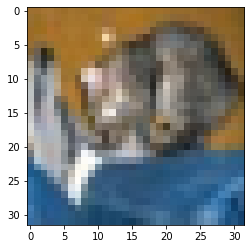

In [11]:
plt.imshow(X_test[0])

In [12]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Build CNN Model

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = [32, 32, 3]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [15]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [16]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.4162 - sparse_categorical_accuracy: 0.4924 - val_loss: 1.1473 - val_sparse_categorical_accuracy: 0.5889
Epoch 2/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.1259 - sparse_categorical_accuracy: 0.6006 - val_loss: 1.0175 - val_sparse_categorical_accuracy: 0.6399
Epoch 3/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.9976 - sparse_categorical_accuracy: 0.6492 - val_loss: 0.9800 - val_sparse_categorical_accuracy: 0.6557
Epoch 4/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.9125 - sparse_categorical_accuracy: 0.6803 - val_loss: 0.9219 - val_sparse_categorical_accuracy: 0.6789
Epoch 5/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.8454 - sparse_categorical_accuracy: 0.7004 - val_loss: 0.9282 - val_sparse_categorical_accuracy: 0.6756
Epoch 6/10
5000

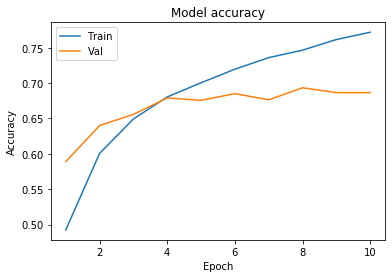

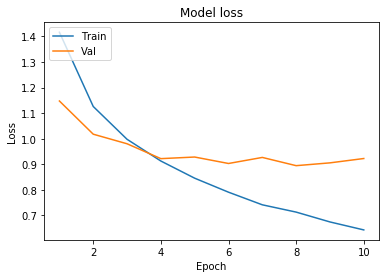

In [17]:
# Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict_classes(X_test)

In [28]:
y_pred

array([3, 8, 0, ..., 3, 1, 7])

In [29]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
mat = confusion_matrix(y_test, y_pred)

In [34]:
mat

array([[687,  23,  59,  21,  28,  11,  16,  10,  86,  59],
       [  5, 791,  13,  11,   1,   1,   5,   2,  35, 136],
       [ 55,   4, 551,  69,  86,  71,  88,  43,  24,   9],
       [ 12,   7,  64, 518,  62, 199,  61,  34,  14,  29],
       [ 10,   6,  57,  69, 683,  37,  57,  65,  10,   6],
       [  8,   5,  52, 182,  51, 597,  20,  61,  13,  11],
       [  5,   5,  41,  60,  41,  26, 795,   6,  16,   5],
       [  9,   5,  31,  46,  60,  62,   5, 761,   5,  16],
       [ 37,  28,  12,  19,   7,   9,   5,   8, 834,  41],
       [ 23,  76,   5,  16,   4,   5,   7,  22,  31, 811]])

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ba55ae518>)

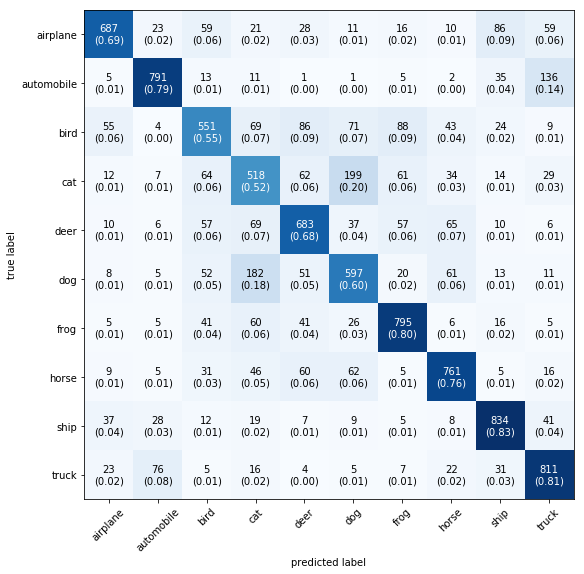

In [38]:
plot_confusion_matrix(mat,figsize=(9,9), class_names=classes_name, show_normed=True)